In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split # Creating training & Testing set
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression # model 
%matplotlib inline

In [2]:
df=pd.read_csv("Salary_Data.csv")

In [4]:
df.shape

(30, 2)

In [5]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

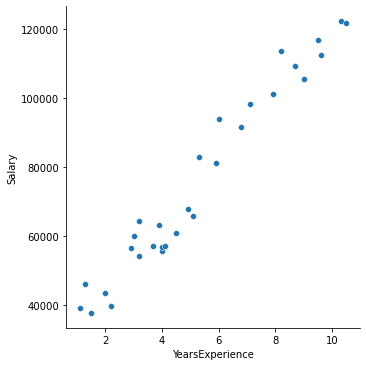

In [7]:
sns.relplot(x="YearsExperience",y="Salary",data=df)

C:\Users\Sagar Suraj Shirke\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

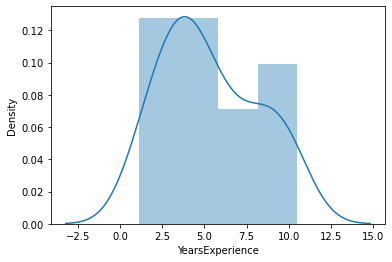

In [9]:
sns.distplot(df["YearsExperience"])

In [10]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [11]:
x=df["YearsExperience"] #independent 
y=df["Salary"] #Dependent (Variable that i want to predict)

In [12]:
x.shape #1 D array

(30,)

In [13]:
x_matrix=x.values.reshape(-1,1) #converting to 2D array as sklearn needs 2d array

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(x_matrix,y,test_size=0.30,random_state=101)

In [15]:
reg=LinearRegression() #model 

In [16]:
reg.fit(X_train,Y_train) # training the model intercept (constant) & slope 

LinearRegression()

In [17]:
reg.coef_

array([9577.17174975])

In [18]:
reg.intercept_

25975.814659541138

In [19]:
predictY=reg.predict(X_test)

In [20]:
from sklearn.metrics import mean_squared_error


mse = mean_squared_error(Y_test, predictY) #Returns mean square error 
print(mse)

17978409.49734413


In [21]:
from math import sqrt
rmse=sqrt(mse)
print(rmse)

4240.095458517901


In [22]:
reg.score(X_train,Y_train) #training accuracy

0.9430010023853349

In [23]:
reg.score(X_test,Y_test) #testing accuracy

0.9746363787521536

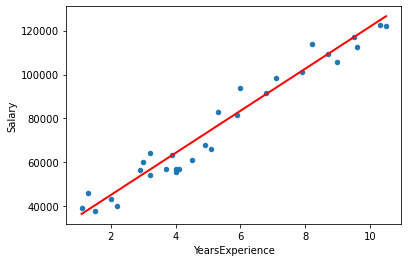

In [25]:
# first, plot the observed data
allpred=reg.predict(x_matrix)
df.plot(kind='scatter', x='YearsExperience', y='Salary')

# then, plot the least squares line
plt.plot(x, allpred, c='red', linewidth=2)

In [28]:
reg.predict(np.array(5).reshape(-1,1))

array([73861.67340827])

In [29]:
import pickle as pk

In [31]:
filename = 'lr_model.pickle'
pk.dump(reg, open(filename, 'wb'))